In [1]:
from msmbuilder.dataset import dataset
import mdtraj as md
from tqdm import tqdm_notebook

In [2]:
wt_xyz = dataset("/Users/je714/wt_data/*/05*nc", topology="/Users/je714/wt_data/test.pdb",
                fmt='mdtraj', stride=20)

In [84]:
ff99SB_xyz = dataset("/Users/je714/Troponin/IAN_Troponin/completehowarthcut/salted/ff99SB/*SALT*/*/*noIONS*.nc",
                    topology="/Users/je714/Troponin/IAN_Troponin/completehowarthcut/salted/ff99SB/WT_ff9SB_noIons.prmtop",
                    fmt='mdtraj', stride=20)

In [105]:
for file in ff99SB_xyz:
    print(file)

<mdtraj.Trajectory with 1750 frames, 6812 atoms, 422 residues, and unitcells>
<mdtraj.Trajectory with 1750 frames, 6812 atoms, 422 residues, and unitcells>
<mdtraj.Trajectory with 1750 frames, 6812 atoms, 422 residues, and unitcells>
<mdtraj.Trajectory with 1750 frames, 6812 atoms, 422 residues, and unitcells>
<mdtraj.Trajectory with 1750 frames, 6812 atoms, 422 residues, and unitcells>
<mdtraj.Trajectory with 1750 frames, 6812 atoms, 422 residues, and unitcells>
<mdtraj.Trajectory with 1800 frames, 6812 atoms, 422 residues, and unitcells>
<mdtraj.Trajectory with 1800 frames, 6812 atoms, 422 residues, and unitcells>
<mdtraj.Trajectory with 1800 frames, 6812 atoms, 422 residues, and unitcells>
<mdtraj.Trajectory with 1800 frames, 6812 atoms, 422 residues, and unitcells>


In [3]:
traj0 = wt_xyz[0]

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
reference = md.load('/Users/je714/wt_data/test.pdb')

In [8]:
test_frame = wt_xyz[0][0]

In [9]:
test_frame

<mdtraj.Trajectory with 1 frames, 6812 atoms, 422 residues, and unitcells at 0x114029dd8>

In [10]:
reference

<mdtraj.Trajectory with 1 frames, 6812 atoms, 422 residues, without unitcells at 0x114029d68>

In [11]:
md.rmsd(test_frame, reference) * 10

array([ 2.20110226], dtype=float32)

In [17]:
distances = []
for traj in tqdm_notebook(wt_xyz):
    for i in range(traj.n_frames):
        distances.append(md.rmsd(traj[i], reference))

In [85]:
distances_ff99SB = []
for traj in tqdm_notebook(ff99SB_xyz):
    for i in range(traj.n_frames):
        distances_ff99SB.append(md.rmsd(traj[i], reference))

In [74]:
test=np.concatenate(distances)

In [76]:
test.shape

(38724,)

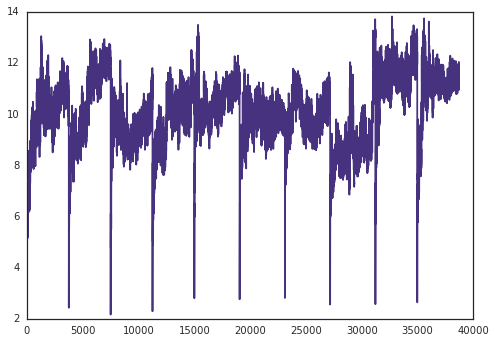

In [69]:
import seaborn as sns; sns.set_style("white"); sns.set_palette("viridis")
plt.plot(np.concatenate(distances)*10)

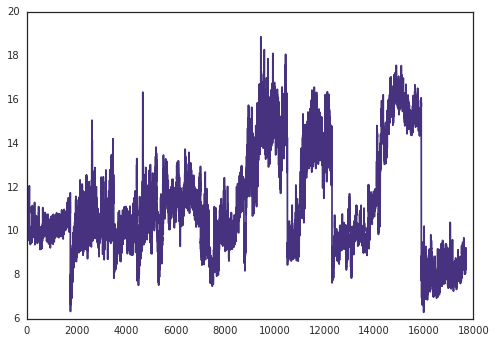

In [106]:
plt.plot(np.concatenate(distances_ff99SB)*10)

In [87]:
def RMSD_density(rmsd_list):
    sns.distplot(np.concatenate(rmsd_list)*10, kde_kws={"shade": True}, hist=False)
    plt.axvline(np.mean(np.concatenate(rmsd_list)*10), ls='dashed')
    plt.ylabel("Density")
    plt.annotate("$\mu$:%.2f Å" % np.mean(np.concatenate(rmsd_list)*10), xy=(2,0.3))
    plt.annotate("$\sigma$:%.2f Å" % np.std(np.concatenate(rmsd_list)*10), xy=(2,0.28))
    plt.xlabel("RMSD (Å)")

(0, 20)

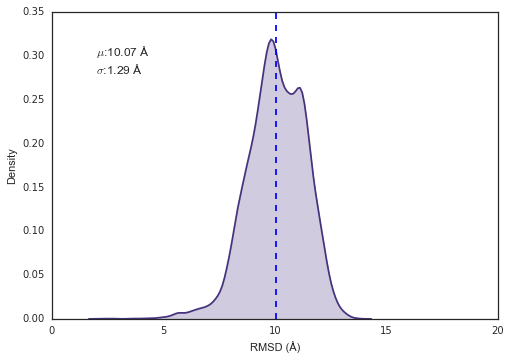

In [91]:
RMSD_density(distances)
plt.xlim(0,20)

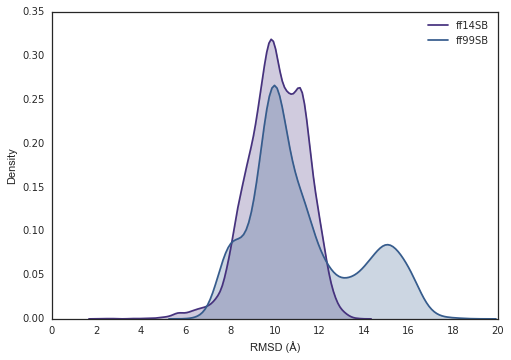

In [104]:
sns.distplot(np.concatenate(distances)*10, kde_kws={"shade": True}, hist=False, label='ff14SB')
sns.distplot(np.concatenate(distances_ff99SB)*10, kde_kws={"shade": True}, hist=False, label='ff99SB')
plt.ylabel("Density")
plt.xlabel("RMSD (Å)")
plt.xticks([x for x in range(0,21) if x%2 == 0])
plt.savefig("/Users/je714/Dropbox (Imperial)/ESAreport/rmsd_distrib.png", format='png', dpi=300)

In [71]:
takeda = md.load("/Users/je714/Troponin/IAN_Troponin/completehowarthcut/salted/1j1d.pdb")

In [72]:
np.mean

<mdtraj.Trajectory with 1 frames, 2825 atoms, 350 residues, without unitcells at 0x11d7e37b8>

In [73]:
md.rmsd(test_frame, takeda)

ValueError: Input trajectories must have same number of atoms. found 6812 and 2825.